# Spotify Exploratory Data Analysis
# Rohan Sikder -  24165816

### Imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Load the dataset 

In [2]:
file_path = 'tracks.csv'
data = pd.read_csv(file_path)

### Check for null values


In [3]:
data.isnull().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

###  Drop duplicate rows 

In [4]:
duplicates = data.duplicated().sum()
print(f'Duplicate entries: {duplicates}')
data = data.drop_duplicates()

Duplicate entries: 171


### Summary of a data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1329 non-null   int64  
 1   duration_ms       1329 non-null   int64  
 2   explicit          1329 non-null   bool   
 3   danceability      1329 non-null   float64
 4   energy            1329 non-null   float64
 5   key               1329 non-null   int64  
 6   loudness          1329 non-null   float64
 7   mode              1329 non-null   int64  
 8   speechiness       1329 non-null   float64
 9   acousticness      1329 non-null   float64
 10  instrumentalness  1329 non-null   float64
 11  liveness          1329 non-null   float64
 12  valence           1329 non-null   float64
 13  tempo             1329 non-null   float64
 14  time_signature    1329 non-null   int64  
 15  track_genre       1329 non-null   object 
dtypes: bool(1), float64(9), int64(5), object(1)
mem

### Printing first few data rows

In [6]:
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


The dataset contains 1500 entries and 16 columns related to music tracks.

- popularity: Popularity of the track (numeric score)
- duration_ms: Duration of the track in milliseconds
- explicit: Whether the track contains explicit content (True/False)
- danceability: How suitable a track is for dancing
- energy: Energy level of the track
- key: Musical key
- loudness: Loudness in dB
- mode: Modality (major=1, minor=0)
- speechiness: Presence of spoken words
- acousticness: Level of acoustic sound
- instrumentalness: Likelihood the track is instrumental
- liveness: Presence of a live audience
- valence: Musical positiveness
- tempo: Tempo in beats per minute (BPM)
- time_signature: Time signature of the music
- track_genre: Genre of the track (categorical)


### Label Encoding genre to numerical

In [7]:
le = LabelEncoder()
data['genre_numeric'] = le.fit_transform(data['track_genre'])

# Checking the mapping
genre_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(genre_mapping)

{'club': 0, 'dance': 1, 'opera': 2}


### Statistics on the data

In [8]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_numeric
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,32.099323,211751.068473,0.528595,0.579531,4.971407,-8.681581,0.656132,0.076010,0.368453,0.187720,0.194220,0.356412,116.479093,3.867570,0.981189
std,23.118489,70127.408617,0.208705,0.266671,3.501174,5.708640,0.475176,0.081802,0.384388,0.324387,0.171072,0.241418,29.349452,0.491411,0.856640
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000,0.000000
25%,19.000000,174967.000000,0.353000,0.370000,2.000000,-10.515000,0.000000,0.036100,0.023100,0.000000,0.097100,0.154000,95.005000,4.000000,0.000000
50%,27.000000,205440.000000,0.559000,0.630000,5.000000,-6.770000,1.000000,0.045300,0.167000,0.000264,0.124000,0.306000,113.831000,4.000000,1.000000
75%,49.000000,240069.000000,0.690000,0.802000,8.000000,-4.967000,1.000000,0.072200,0.807000,0.232000,0.222000,0.535000,133.002000,4.000000,2.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000,2.000000


### Distribution of Popularity


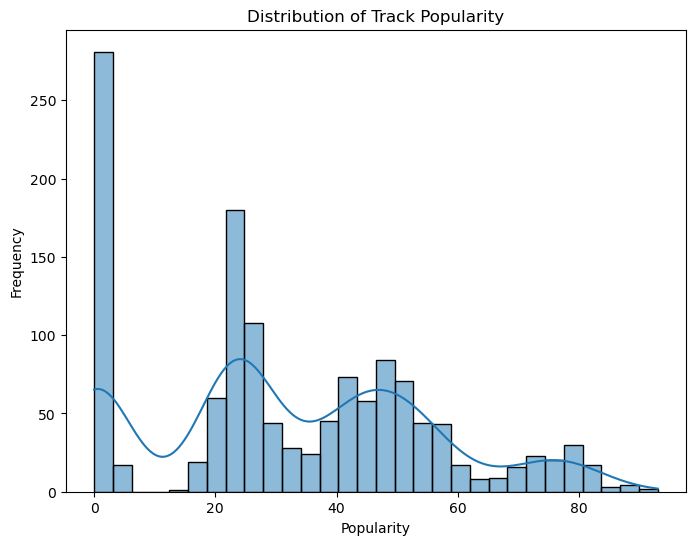

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data['popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

The distribution of track popularity scores across the dataset is shown in a histogram. The data seems to be skewed in the opposite direction, with many tracks having near 0 popularity. There are also some peaks around 20, 40 and 60 - suggesting that some tracks cluster around those popularity levels.

The kernel density estimate (KDE) line indicates a multimodal distribution, which implies that there may be multiple groups or factors influencing track popularity. Very few tracks reach extremely high popularity (80), suggesting that most tracks in the dataset are moderately to lowly popular.

### Correlation Heatmap

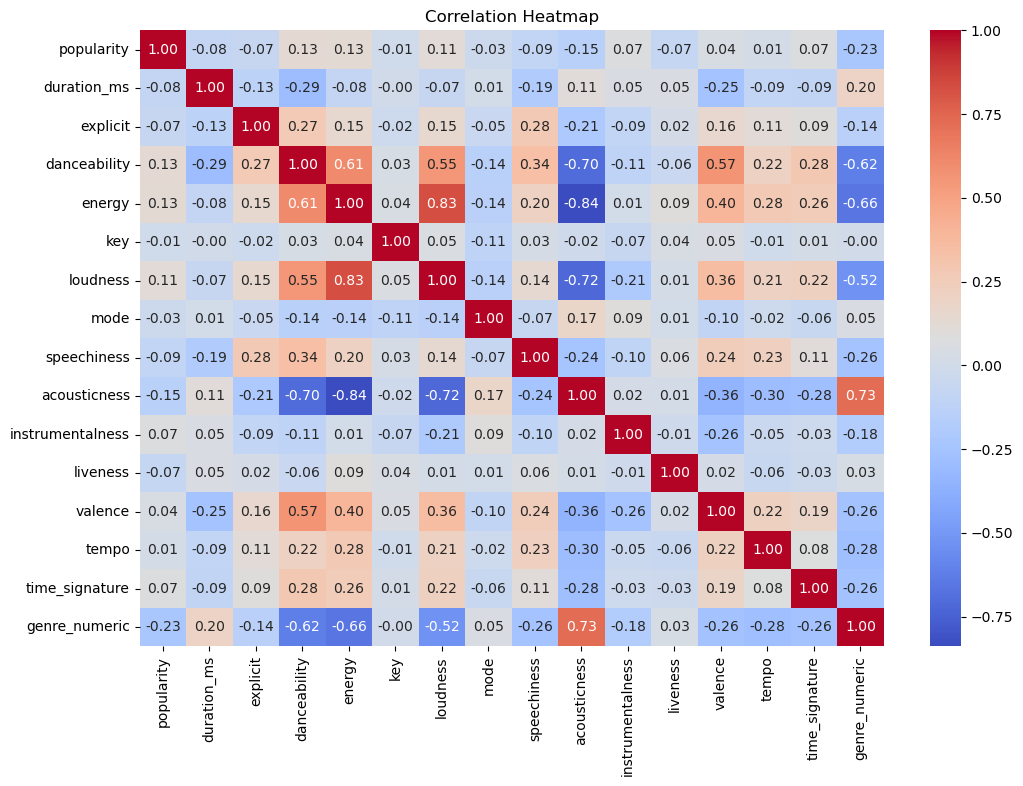

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<b>Strong Positive Correlations:</b>

- Danceability, Energy and Loudness: These features show strong positive correlations with each other. This suggests that tracks with higher danceability tend to have higher energy and loudness, which aligns with our intuition about energetic music.

- Danceability and Valence: A moderate positive correlation exists, showing that more danceable tracks often have a higher valence (positivity).

<b>Strong Negative Correlations:</b>

- Acousticness and Energy: This is a negative correlation. Tracks with high acousticness (acoustic instruments) tend to have lower energy which is expected.

- Acousticness and Loudness: Similar to energy, acousticness is negatively correlated with loudness.

- Acousticness and Danceability: Acoustic tracks tend to be less danceable.

- Acousticness and Genre_numeric: The strong negative correlation here shows certain genres (represented by 'genre_numeric') are associated with higher acousticness, while others are associated with lower acousticness.

- Danceability and Genre_numeric: Danceability has a strong negative correlation with the 'genre_numeric' feature, showing that certain genres are associated with lower danceability.

<b>Observations about Genre_numeric:</b>


The 'genre_numeric' feature shows strong correlations (both positive and negative) with several other features. This indicates that genre plays a big role in determining various track characteristics.
The strong negative correlations with danceability, energy and loudness suggest that some genres are associated with less energetic, less loud and less danceable music.
The strong positive correlation with acousticness suggests that certain genres are more associated with acoustic music.

### Scatter plot: Danceability vs Popularity

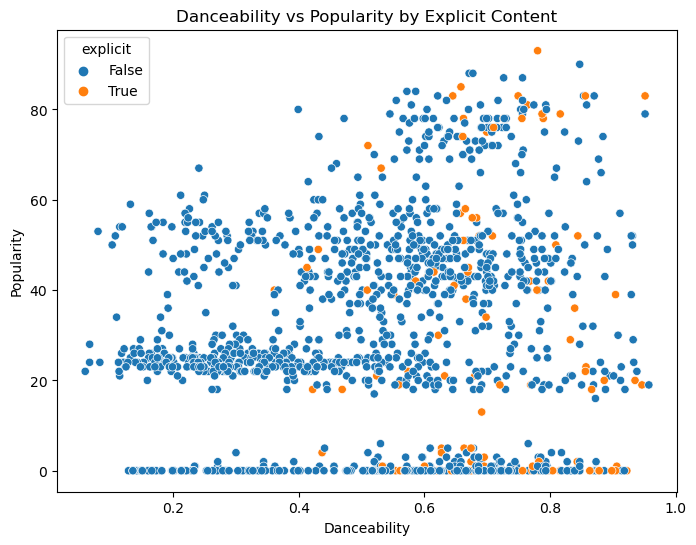

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='popularity', data=data, hue='explicit')
plt.title('Danceability vs Popularity by Explicit Content')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

This scatter plot compares danceability with popularity separated by explicit content. A moderately positive correlation is also observed, indicating that improved danceability might slightly widen the popularity score range, though many tracks stay in the low to mid popularity range. Explicit content seems to have very little effect on popularity or danceability, along with explicit and non-explicit tracks have a similar distribution. A large number of zero popularity tracks asks for further investigation and several high popularity outliers are apparent. In general, danceability alone most likely isn't a strong indicator of popularity.

### Box plot of Loudness by Genre


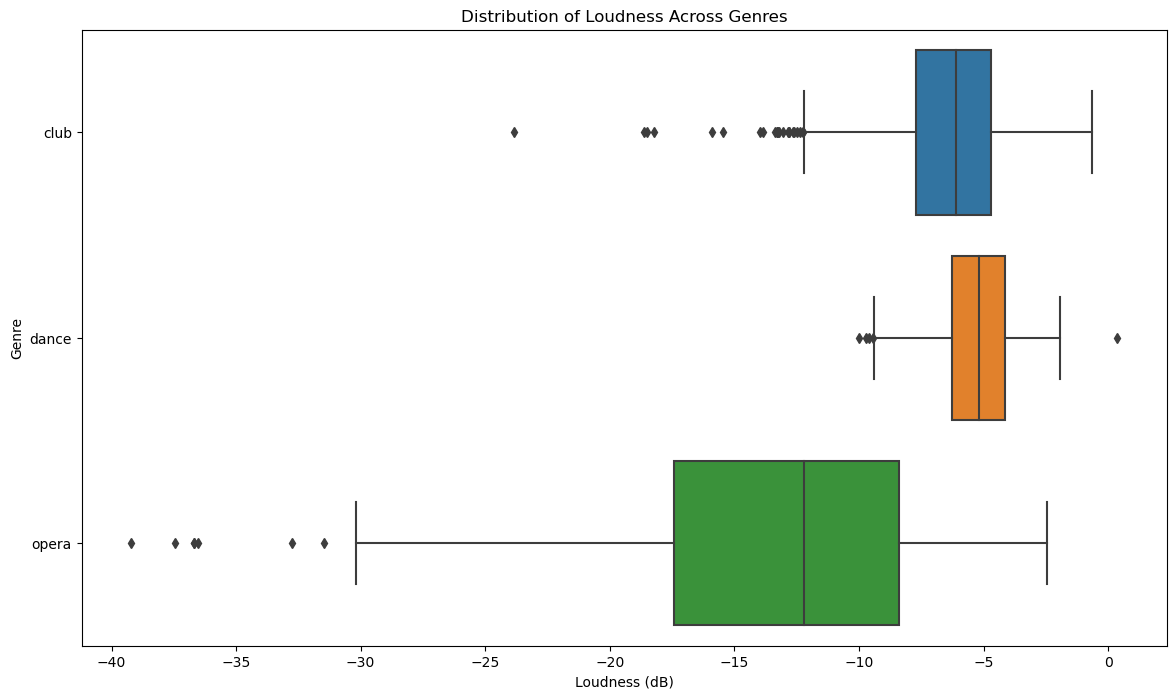

In [12]:
plt.figure(figsize=(14, 8))
sns.boxplot(y='track_genre', x='loudness', data=data)
plt.title('Distribution of Loudness Across Genres')
plt.xlabel('Loudness (dB)')
plt.ylabel('Genre')
plt.show()

This boxplot shows the distribution of loudness across three genres club, dance and opera. Club and dance music show significantly higher and more consistent loudness, with medians around -5 and -6 dB respectively. Contrast to opera music is more quieter, with a median around -15 dB and shows a wider distribution indicating greater variability in loudness. The presence of outliers, particularly in the opera genre, suggests potential data anomalies or tracks with unusually low loudness. Overall, genre appears to be a strong determinant of track loudness in this dataset.

### Duration Distribution:

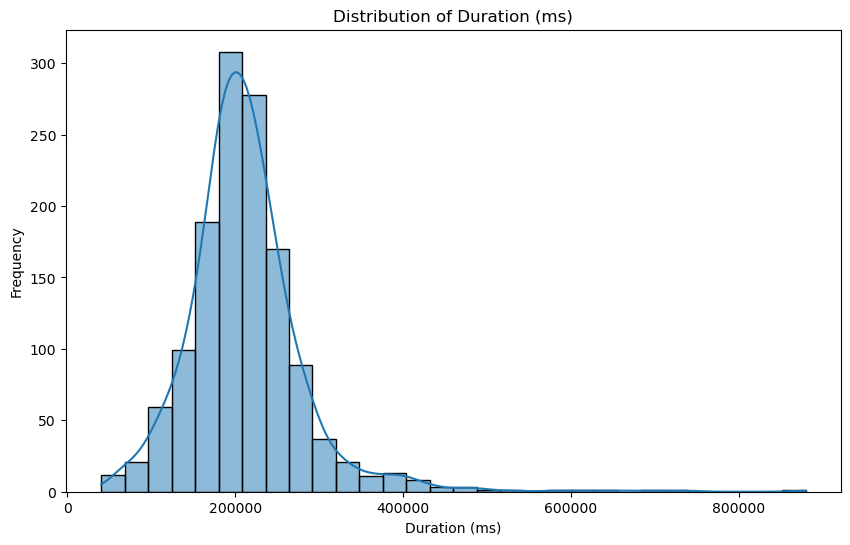

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['duration_ms'], bins=30, kde=True)
plt.title('Distribution of Duration (ms)')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()

This histogram shows how music track durations are distributed in milliseconds. The figure indicates that most tracks are short, getting to a maximum at more or less 200,000 milliseconds (three minutes and twenty seconds). A typical range for song lengths would be 100,000 to 300,000 milliseconds, as numerous tracks fall within this range. However the distribution is skewered, with a long tail extending for considerably longer periods. This means there are less long tracks (although a few are), indicating that some songs or recordings are far longer compared to the average track. The curve demonstrates that shorter songs are a lot more common in this dataset.

### Distribution of Tempo

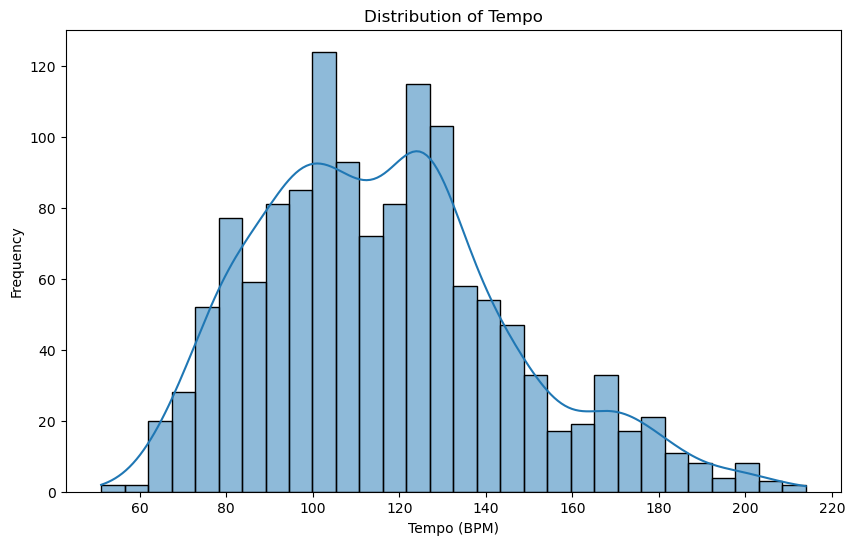

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['tempo'], bins=30, kde=True)
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.show()

This histogram displays the distribution of track tempos, measured in beats per minute (BPM), in a clear bimodal pattern.  The graph shows two distinct peaks, one around 100-110 BPM and another around 120-130 BPM, indicating that these tempo ranges are most prevalent in the dataset.  This suggests that the music represented likely falls into categories that commonly utilize these tempos, potentially reflecting popular genres or dance styles.  While the distribution spans a relatively wide range from 60 to 200 BPM, the frequency of tracks significantly decreases at the either ends, highlighting that very slow or very fast tempos are less common.  The bimodal shape, confirmed by the kernel density estimate curve, strongly suggests the presence of two distinct tempo clusters within the data, which could be further explored to understand genre specific tempo preferences.

### Pair Plot Analysis: Relationships Between Music Features

/Users/rohansikder/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


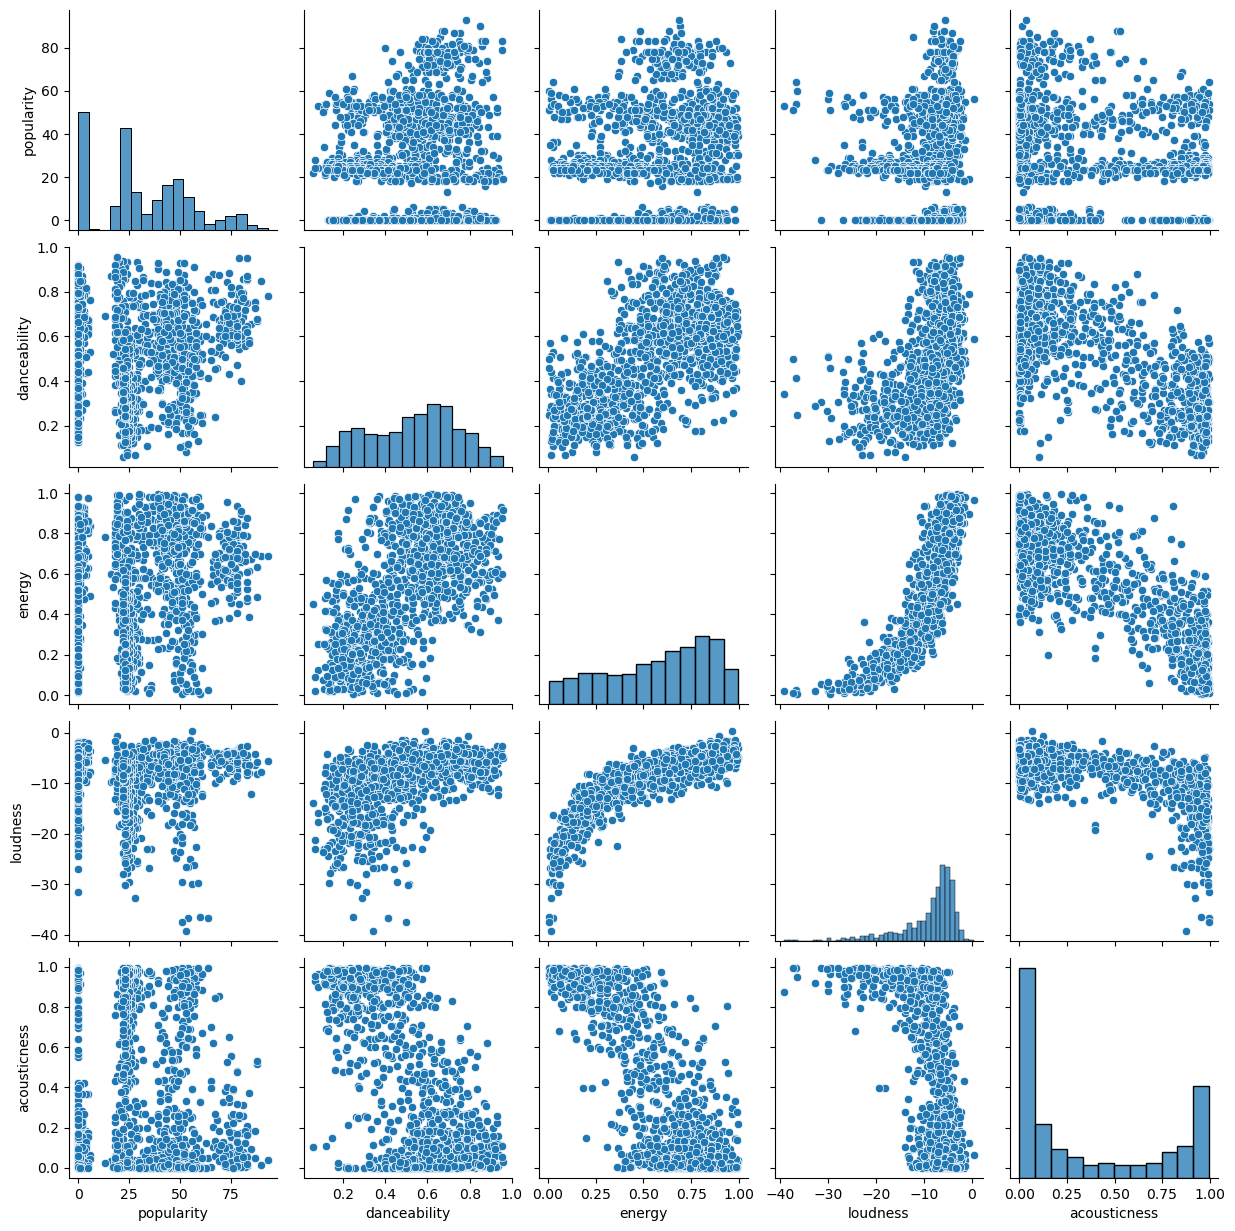

In [15]:
sns.pairplot(data[['popularity', 'danceability', 'energy', 'loudness', 'acousticness']])
plt.show()

This pair plot visualizes relationships between five music features: popularity, danceability, energy, loudness and acousticness. Histograms along the diagonal reveal the distribution of each feature, while scatter plots in the off diagonal cells show pairwise relationships. Notably, strong correlations are observed between energy and loudness and between acousticness and both energy and loudness.  Popularity shows no strong linear correlation with any single feature, but higher popularity appears associated with tracks possessing higher danceability, energy and loudness to some extent. The distributions of energy and acousticness suggest bimodal patterns, indicating distinct clusters within those features.

### Bar Chart Analysis: Average Popularity by Genre



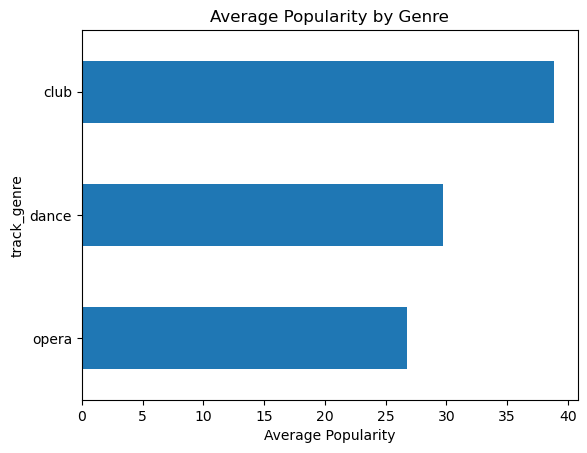

In [16]:
genre_popularity = data.groupby('track_genre')['popularity'].mean().sort_values()
genre_popularity.plot(kind='barh')
plt.xlabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.show()


This horizontal bar chart evaluates the median of 3 genres of music: club, dance and opera. Club music has the highest average popularity approaching 40 and dance shows a moderate average around 30. The least popular genre of opera music is opera music (with a score close to 27). This suggests a popularity ranking of club > dance > opera. This suggests significant audience engagement or platform representation differences between these genres.

# Feature Engineering

- Duration in Minutes: Simplifies interpretation and analysis.

- Energy-Danceability Interaction: Captures the combined effect of two important attributes.

- Tempo Categories: Provides a categorical feature that could reveal trends in popularity or genre.

- Loudness Normalization: Ensures loudness is on a comparable scale with other features.

In [17]:
data['duration_min'] = data['duration_ms'] / 60000

The duration_ms column is in milliseconds, which is not readable. Converting it to minutes makes it easier to interpret and use in models.

In [18]:
data['energy_danceability'] = data['energy'] * data['danceability']

Tracks that are both energetic and danceable might be more popular. This interaction feature captures the combined effect of these two attributes.

In [19]:
data['tempo_category'] = pd.cut(data['tempo'], bins=[0, 60, 120, 180, 250], labels=['slow', 'medium', 'fast', 'very fast'])


Tempo (BPM) can be categorized into ranges (e.g., slow, medium, fast) to simplify analysis and capture trends in popularity or genre.

In [20]:
data['loudness_norm'] = (data['loudness'] - data['loudness'].min()) / (data['loudness'].max() - data['loudness'].min())


Loudness is measured in decibels (dB), which is a logarithmic scale. Normalizing it to a 0-1 range ensures it can be compared with other features on the same scale.

### Scatter plot of energy vs. danceability

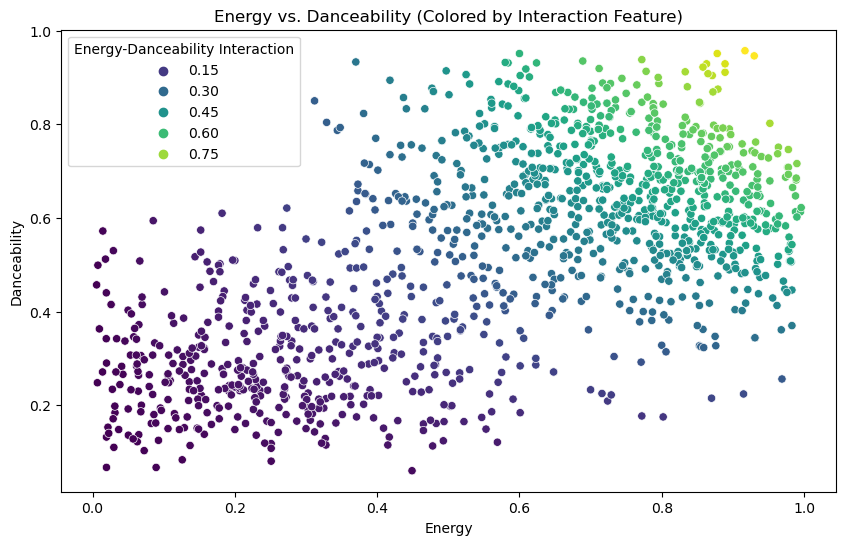

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='danceability', hue='energy_danceability', data=data, palette='viridis')
plt.title('Energy vs. Danceability (Colored by Interaction Feature)')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.legend(title='Energy-Danceability Interaction')
plt.show()

###  Bar plot of tempo categories


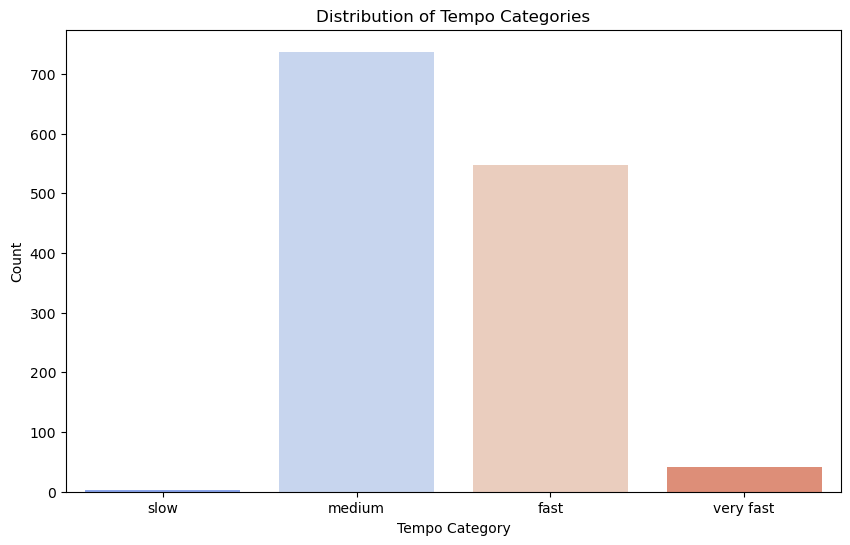

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='tempo_category', data=data, palette='coolwarm')
plt.title('Distribution of Tempo Categories')
plt.xlabel('Tempo Category')
plt.ylabel('Count')
plt.show()

### Plot distribution of normalized loudness


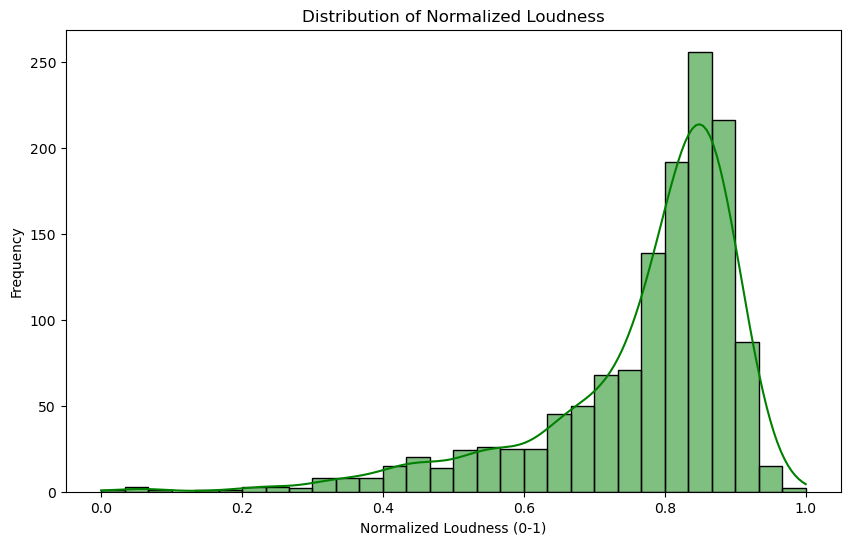

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['loudness_norm'], bins=30, kde=True, color='green')
plt.title('Distribution of Normalized Loudness')
plt.xlabel('Normalized Loudness (0-1)')
plt.ylabel('Frequency')
plt.show()

### Pairplot of engineered features


/Users/rohansikder/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


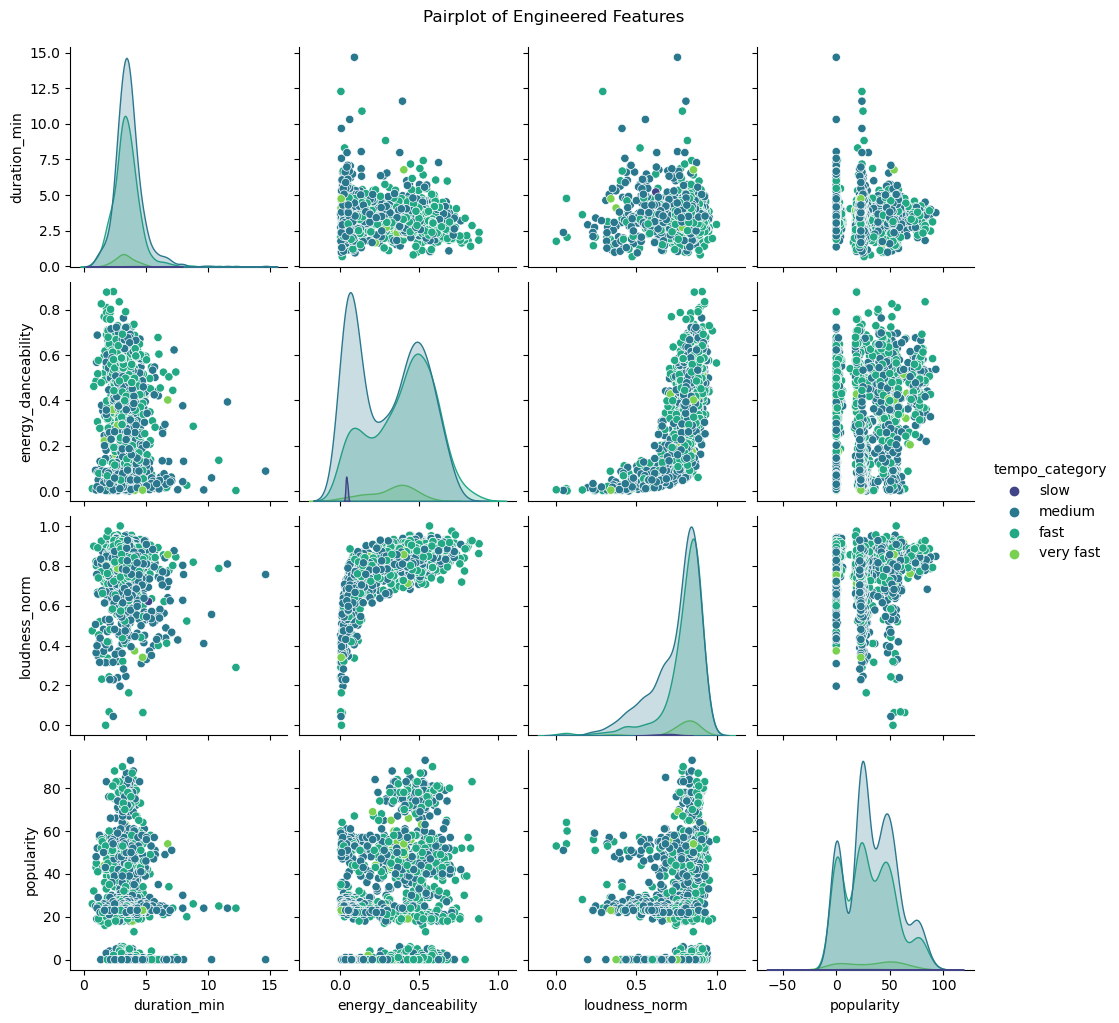

In [24]:
sns.pairplot(data[['duration_min', 'energy_danceability', 'tempo_category', 'loudness_norm', 'popularity']], hue='tempo_category', palette='viridis')
plt.suptitle('Pairplot of Engineered Features', y=1.02)
plt.show()

### Summary statistics for engineered features

In [25]:
engineered_features_summary = data[['duration_min', 'energy_danceability', 'tempo_category', 'loudness_norm']].describe()
print(engineered_features_summary)

       duration_min  energy_danceability  loudness_norm
count   1329.000000          1329.000000    1329.000000
mean       3.529184             0.340073       0.771439
std        1.168790             0.214082       0.144212
min        0.671100             0.001310       0.000000
25%        2.916117             0.118686       0.725123
50%        3.424000             0.378495       0.819730
75%        4.001150             0.516255       0.865277
max       14.665083             0.879780       1.000000


### Correlation heatmap of engineered features and popularity


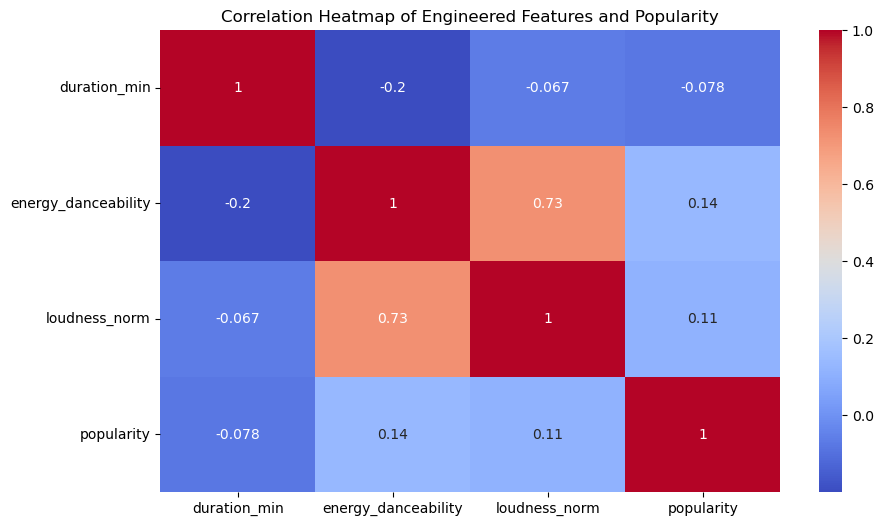

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['duration_min', 'energy_danceability', 'loudness_norm', 'popularity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Engineered Features and Popularity')
plt.show()